<a href="https://colab.research.google.com/github/fedhere/PUS2020_FBianco/blob/master/prepare_citibike_by_county.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# reproducible Spatial Data Analysis with pandas
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

N.B. This workbook is based on one by SRK325. Choropleths and spatial join sections added by CMP670.

## Import initial libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pylab as plt
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False


In [2]:
!pip install geopandas

     |████████████████████████████████| 972kB 2.7MB/s 
     |████████████████████████████████| 14.8MB 283kB/s 
     |████████████████████████████████| 10.9MB 34.9MB/s 


In [3]:
!apt install python3-rtree 


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 6 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 python3-pkg-resources all 39.0.1-2 [98.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB

In [4]:
import geopandas as gpd

In [5]:
!pip install -U --no-deps mapclassify git+git://github.com/geopandas/geopandas.git@master


  Cloning git://github.com/geopandas/geopandas.git (to revision master) to /tmp/pip-req-build-t4bsfcuv
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-t4bsfcuv
  Created wheel for geopandas: filename=geopandas-0.8.0+52.g7e595d0-py2.py3-none-any.whl size=969239 sha256=26f3e947279e4f8d25005ede3c1e2a863eb7462c70015e9174a1d73f6330f948
  Stored in directory: /tmp/pip-ephem-wheel-cache-l5ijp9iy/wheels/1e/57/dc/7a5ea8503aefb23576c42181adfca7fc173fde5b71900660bc
Successfully built geopandas
  Found existing installation: geopandas 0.8.1
    Uninstalling geopandas-0.8.1:
      Successfully uninstalled geopandas-0.8.1


## Loading a shape file after you save it in your drive
I already saved it in the shared drive PUS2020 that you all have access to

In [6]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [7]:
cd /content/drive/Shared\ drives/PUS2020

/content/drive/Shared drives/PUS2020


In [8]:
ls data

'2010 Census Tracts'/
 201903-citibike-tripdata.csv.zip
 201904-citibike-tripdata.csv.zip
 201905-citibike-tripdata.csv.zip
 201906-citibike-tripdata.csv.zip
 202003-citibike-tripdata.csv.zip
 202004-citibike-tripdata.csv.zip
 202005-citibike-tripdata.csv.zip
 202006-citibike-tripdata.csv.zip
 arrest_data_daily_by_zip.csv
 citibike/
 citibikes_monthly.csv
 Longitude_Graticules_and_World_Countries_Boundaries-shp/
 MapPLUTO.cpg
 MapPLUTO.dbf
 MapPLUTO.prj
 MapPLUTO.sbn
 MapPLUTO.sbx
 MapPLUTO.shp
 MapPLUTO.shp.xml
 MapPLUTO.shx
 MNMapPLUTO.dbf
 MNMapPLUTO.prj
 MNMapPLUTO.sbn
 MNMapPLUTO.sbx
 MNMapPLUTO.shp
 MNMapPLUTO.shp.xml
 MNMapPLUTO.shx
 natural_earth_vector/
 PLUTODD20v5.pdf
 PlutoReadme20v5.pdf
 PPR_Properties.csv
 Varnamesnlabels_m2ihip_R.xlsx
 Varnamesnlabels_m2ihip.xlsx


In [9]:
ls "data/2010 Census Tracts"

geo_export_342ef674-8015-48e8-b6a4-611ab0993e4f.dbf
geo_export_342ef674-8015-48e8-b6a4-611ab0993e4f.prj
geo_export_342ef674-8015-48e8-b6a4-611ab0993e4f.shp
geo_export_342ef674-8015-48e8-b6a4-611ab0993e4f.shx


In [10]:
shape_path = "data/2010 Census Tracts/geo_export_342ef674-8015-48e8-b6a4-611ab0993e4f.shp"
ct_shape = gpd.GeoDataFrame.from_file(shape_path)
ct_shape.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.199811,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010000,Manhattan,I,010000,100,MN19,Turtle Bay-East Midtown,3808,1.860938e+06,5692.168737,"POLYGON ((-73.96802 40.75958, -73.96848 40.758..."
3,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
4,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."


In [11]:
ct_shape.describe()

,shape_area,shape_leng
count,2.165000e+03,2165.000000
mean,3.891504e+06,8727.346925
std,7.952934e+06,8421.790925
min,4.478076e+05,2816.869532
25%,1.683689e+06,5622.863766
50%,1.987938e+06,6496.952057
75%,3.192228e+06,8734.805687
max,1.966297e+08,182384.827557


# Coordinate systems, projections, and transformations 

conver to EPSG 2263 which is coordinated in feet, instead of lat long degrees

extract the area of each gemetry : the geometry column has many relevant methods

calculate the total area in miles squared. the feet to meter conversion is here 
https://www.google.com/search?sxsrf=ALeKk03B4ThQrJJXpFzoCrgRfrJ1nByPMg%3A1600870977934&ei=QVprX9muOIOl_QbOtaOwCQ&q=feet+to+mile&oq=feet+to+mile&gs_lcp=CgZwc3ktYWIQAzIICAAQsQMQkQIyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAMgIIADICCAA6BAgAEEc6BAgjECc6BQgAELEDOgoIABCxAxAUEIcCUM_1AVjK-AFgzPoBaABwAngAgAFkiAHvApIBAzMuMZgBAKABAaoBB2d3cy13aXrIAQjAAQE&sclient=psy-ab&ved=0ahUKEwiZ0-GPvf_rAhWDUt8KHc7aCJYQ4dUDCA0&uact=5

can you do it in 1 line?

In [12]:
from fiona.crs import from_epsg


# Explore CitiBike data

### Load CitiBike data

In [13]:
cb201309 = pd.read_csv('https://s3.amazonaws.com/tripdata/201309-citibike-tripdata.zip', index_col='starttime')
cb201309.head()

,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
starttime,,,,,,,,,,,,,,
2013-09-01 00:00:02,1010,2013-09-01 00:16:52,254,W 11 St & 6 Ave,40.735324,-73.998004,147,Greenwich St & Warren St,40.715422,-74.011220,15014,Subscriber,1974,1
2013-09-01 00:00:09,1443,2013-09-01 00:24:12,151,Cleveland Pl & Spring St,40.721816,-73.997203,497,E 17 St & Broadway,40.737050,-73.990093,19393,Customer,\N,0
2013-09-01 00:00:16,1387,2013-09-01 00:23:23,352,W 56 St & 6 Ave,40.763406,-73.977225,405,Washington St & Gansevoort St,40.739323,-74.008119,16160,Subscriber,1992,1
2013-09-01 00:00:18,405,2013-09-01 00:07:03,490,8 Ave & W 33 St,40.751551,-73.993934,459,W 20 St & 11 Ave,40.746745,-74.007756,14997,Subscriber,1973,1
2013-09-01 00:00:20,270,2013-09-01 00:04:50,236,St Marks Pl & 2 Ave,40.728419,-73.987140,393,E 5 St & Avenue C,40.722992,-73.979955,19609,Subscriber,1984,1


In [14]:
cb201309.index = pd.to_datetime(cb201309.index)

## Map CitiBike Data to CT level

### extract CitiBike station location data

In [15]:
cb201309.groupby("start station id").first()

,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
start station id,,,,,,,,,,,,,
72,143,2013-09-01 01:29:19,W 52 St & 11 Ave,40.767272,-73.993929,367,E 53 St & Lexington Ave,40.758281,-73.970694,16521,Subscriber,1960,1
79,1049,2013-09-01 00:37:46,Franklin St & W Broadway,40.719116,-74.006667,363,West Thames St,40.708347,-74.017134,17660,Customer,\N,0
82,437,2013-09-01 12:09:47,St James Pl & Pearl St,40.711174,-74.000165,151,Cleveland Pl & Spring St,40.721816,-73.997203,19046,Subscriber,1980,2
83,857,2013-09-01 00:57:59,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,406,Hicks St & Montague St,40.695128,-73.995951,19618,Subscriber,1977,2
116,468,2013-09-01 00:13:46,W 17 St & 8 Ave,40.741776,-74.001497,540,Lexington Ave & E 26 St,40.741473,-73.983209,17346,Subscriber,1991,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,266,2013-09-01 00:08:15,E 43 St & 2 Ave,40.750224,-73.971214,228,E 48 St & 3 Ave,40.754601,-73.971879,18462,Subscriber,1981,1
2021,1727,2013-09-01 01:05:25,W 45 St & 8 Ave,40.759291,-73.988597,218,Gallatin Pl & Livingston St,40.690284,-73.987071,16734,Customer,\N,0
2022,1233,2013-09-01 00:39:20,E 59 St & Sutton Pl,40.758491,-73.959206,528,2 Ave & E 31 St,40.742909,-73.977061,19488,Subscriber,1961,2


In [16]:
station_id = cb201309.groupby("start station id").first()[["start station latitude","start station longitude"]]
station_id.rename({"start station latitude":"lat","start station longitude":"lon"}, axis=1, inplace=True)
#station_id.index = station_id.index.astype(str)
station_id.head()

,lat,lon
start station id,,
72,40.767272,-73.993929
79,40.719116,-74.006667
82,40.711174,-74.000165
83,40.683826,-73.976323
116,40.741776,-74.001497


### Create CitiBike station Geometry (Point) from Coordinates (Lat & Lon)

In [17]:
import shapely
# combine lat and lon to one column
station_id['lonlat'] = list(zip(station_id.lon,station_id.lat))
# Create Point Geometry for based on lonlat column
station_id['geometry'] = station_id[['lonlat']].applymap(lambda x:shapely.geometry.Point(x))
station_id = gpd.GeoDataFrame(station_id)
station_id.head()

,lat,lon,lonlat,geometry
start station id,,,,
72,40.767272,-73.993929,"(-73.99392888, 40.76727216)",POINT (-73.99393 40.76727)
79,40.719116,-74.006667,"(-74.00666661, 40.71911552)",POINT (-74.00667 40.71912)
82,40.711174,-74.000165,"(-74.00016545, 40.71117416)",POINT (-74.00017 40.71117)
83,40.683826,-73.976323,"(-73.97632328, 40.68382604)",POINT (-73.97632 40.68383)
116,40.741776,-74.001497,"(-74.00149746, 40.74177603)",POINT (-74.00150 40.74178)


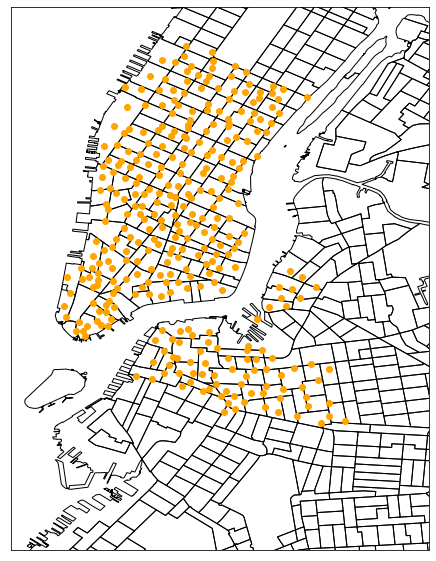

In [18]:
f, ax = plt.subplots(figsize=(10,10))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ct_shape.plot(ax=ax, color="None", edgecolor='k')
station_id.plot(ax=ax, c='orange');
ax.set_xlim(-74.03, -73.93)
ax.set_ylim(40.65, 40.78);

# Intersect  two geometries
``` gdp.ct_shape.geometry.intersect```



## Perform a spatial join

Perfoming an $n \times m$ intersection test is horrifically inefficient and slow. Spatial joins use an R-tree for spatial indexing to rapidly join the tables on their geometries. 

Spatial joins operate on objects with eastings and northings, i.e., you must transform ALL data into a common CRS expressed with dimensioned lengths. This will NOT work on data expressed in lat/long!

In [19]:
from geopandas.tools import sjoin

In [20]:
# NOTE: I just created the gDF. it does not have a set of coordinates associated to the shapes!
station_id.crs 

In [21]:
station_id.crs = from_epsg(4326)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [22]:
station_ft = station_id.to_crs(epsg=2263)
ct_ft = ct_shape.to_crs(epsg=2263)

In [23]:
ct_ft.head(1)

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((962269.126 173705.500, 962288.722 17..."


In [24]:
station_ft.head(3)

,lat,lon,lonlat,geometry
start station id,,,,
72,40.767272,-73.993929,"(-73.99392888, 40.76727216)",POINT (985931.707 218814.757)
79,40.719116,-74.006667,"(-74.00666661, 40.71911552)",POINT (982402.007 201269.770)
82,40.711174,-74.000165,"(-74.00016545, 40.71117416)",POINT (984204.132 198376.421)


In [25]:
station_ft.shape

(330, 4)

In [26]:
station_id = sjoin(ct_ft, station_ft.reset_index())[["boro_ct201", "geometry",
                                                      "start station id",
                                                     "lonlat"]]
station_id.head(3)

,boro_ct201,geometry,start station id,lonlat
1,1009800,"POLYGON ((994133.507 214848.898, 994005.909 21...",454,"(-73.96592976, 40.75455731)"
1,1009800,"POLYGON ((994133.507 214848.898, 994005.909 21...",441,"(-73.967416, 40.756014)"
2,1010000,"POLYGON ((993108.306 216013.131, 992982.220 21...",522,"(-73.97207836, 40.75714758)"


In [27]:
station_id.shape

(330, 4)

In [28]:
station_id.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - New York - SPCS - Long Island
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# count trips by census tract

## count rides by census tract

In [29]:
station_id =  station_id.merge(cb201309, left_on="start station id", right_on="start station id")
#cb201309.groupby("start station id").count()[["tripduration"]
#                                ].rename({"tripduration":"MonthlyAve"}, axis=1)
station_id.shape

(1034359, 17)

In [30]:
# add the series to station id
monthlyrides_boro = station_id.groupby("boro_ct201").count()[["tripduration"]].rename(
    {"tripduration":"monthlyrides"}, axis=1)

In [31]:
monthlyrides_boro.head()

,monthlyrides
boro_ct201,
1000202,4809
1000600,5817
1000700,19521
1000800,2817
1000900,5466


In [32]:
tripsbyct = station_id.groupby("boro_ct201").first().merge(monthlyrides_boro, left_index=True, right_index=True)

In [33]:
tripsbyct.head()

,geometry,start station id,lonlat,tripduration,stoptime,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,monthlyrides
boro_ct201,,,,,,,,,,,,,,,,,
1000202,"MULTIPOLYGON (((989137.110 196325.439, 989113....",332,"(-73.97948148, 40.71219906)",833,2013-09-01 07:56:22,Cherry St,40.712199,-73.979481,224,Spruce St & Nassau St,40.711464,-74.005524,14533,Subscriber,1966,2,4809
1000600,"POLYGON ((986961.186 199553.643, 987206.139 19...",331,"(-73.99193043, 40.71173107)",610,2013-09-01 07:27:15,Pike St & Monroe St,40.711731,-73.991930,302,Avenue D & E 3 St,40.720828,-73.977932,15667,Subscriber,1963,1,5817
1000700,"MULTIPOLYGON (((984804.689 193867.306, 984798....",315,"(-74.00670227, 40.70355377)",2087,2013-09-01 09:02:33,South St & Gouverneur Ln,40.703554,-74.006702,495,W 47 St & 10 Ave,40.762699,-73.993012,16592,Customer,\N,0,19521
1000800,"POLYGON ((986494.145 197775.830, 986457.043 19...",408,"(-73.99400398, 40.71076228)",1654,2013-09-01 01:54:40,Market St & Cherry St,40.710762,-73.994004,363,West Thames St,40.708347,-74.017134,19620,Subscriber,1980,1,2817
1000900,"MULTIPOLYGON (((984032.884 192223.748, 983984....",259,"(-74.01234218, 40.70122128)",681,2013-09-01 05:40:38,South St & Whitehall St,40.701221,-74.012342,417,Barclay St & Church St,40.712912,-74.010202,16693,Subscriber,1977,1,5466


## Add Monthly rides to the station GeoDataFrame with CT code

(977916.2223968485, 999277.1364288309, 184458.2205290992, 233167.63426811201)

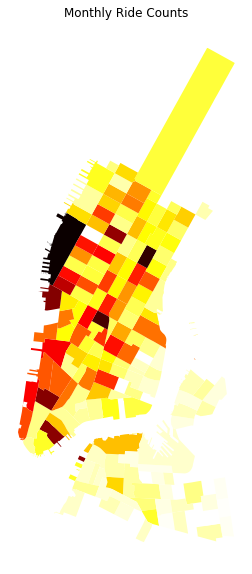

In [34]:
f, ax = plt.subplots(figsize=(10,10))
tripsbyct.plot(column='monthlyrides',cmap='hot_r',alpha=1,linewidth=0.1,ax=ax)
plt.title("Monthly Ride Counts");
plt.axis('off')

### Removing the CTs that are out of zoom boundries

In [35]:
print ('Total number of CTs: {}'.format(ct_shape.shape[0]))
print ('Number of zoomed CTs: {}'.format(len(tripsbyct.monthlyrides)))

Total number of CTs: 2165
Number of zoomed CTs: 163


### Map the monthly rides 

### Export Shapefile CTs in the CitiBike Zone

In [36]:
%mkdir Output

mkdir: cannot create directory ‘Output’: File exists


In [37]:
tripsbyct.columns

Index(['geometry', 'start station id', 'lonlat', 'tripduration', 'stoptime',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'monthlyrides'],
      dtype='object')

In [38]:
tripsbyct = tripsbyct[['geometry', 'start station id', 'start station latitude',
       'start station longitude', 'monthlyrides']]
tripsbyct

,geometry,start station id,start station latitude,start station longitude,monthlyrides
boro_ct201,,,,,
1000202,"MULTIPOLYGON (((989137.110 196325.439, 989113....",332,40.712199,-73.979481,4809
1000600,"POLYGON ((986961.186 199553.643, 987206.139 19...",331,40.711731,-73.991930,5817
1000700,"MULTIPOLYGON (((984804.689 193867.306, 984798....",315,40.703554,-74.006702,19521
1000800,"POLYGON ((986494.145 197775.830, 986457.043 19...",408,40.710762,-73.994004,2817
1000900,"MULTIPOLYGON (((984032.884 192223.748, 983984....",259,40.701221,-74.012342,5466
...,...,...,...,...,...
3054900,"POLYGON ((994945.336 198442.546, 994837.843 19...",389,40.710446,-73.965251,1908
3055100,"POLYGON ((994568.723 199811.333, 994981.983 19...",481,40.712605,-73.962644,1154
3055300,"POLYGON ((996490.405 200716.407, 996325.543 20...",539,40.715348,-73.960241,2665


In [39]:
path = 'Output/ct_shape_MonthlyAve_Zoom.shp'
tripsbyct.to_file(path)

In [40]:
gpd.GeoDataFrame.from_file(path)

,boro_ct201,start stat,start st_1,start st_2,monthlyrid,geometry
0,1000202,332,40.712199,-73.979481,4809,"MULTIPOLYGON (((989137.110 196325.439, 989113...."
1,1000600,331,40.711731,-73.991930,5817,"POLYGON ((986961.186 199553.643, 987206.139 19..."
2,1000700,315,40.703554,-74.006702,19521,"MULTIPOLYGON (((984804.689 193867.306, 984798...."
3,1000800,408,40.710762,-73.994004,2817,"POLYGON ((986494.145 197775.830, 986457.043 19..."
4,1000900,259,40.701221,-74.012342,5466,"MULTIPOLYGON (((984032.884 192223.748, 983984...."
...,...,...,...,...,...,...
158,3054900,389,40.710446,-73.965251,1908,"POLYGON ((994945.336 198442.546, 994837.843 19..."
159,3055100,481,40.712605,-73.962644,1154,"POLYGON ((994568.723 199811.333, 994981.983 19..."
160,3055300,539,40.715348,-73.960241,2665,"POLYGON ((996490.405 200716.407, 996325.543 20..."
161,3055500,2002,40.716887,-73.963198,2095,"POLYGON ((995613.061 201097.814, 995447.441 20..."
